# Data Analysis of Credit Card Fraud

In [42]:
#ref: https://github.com/rmacaraeg/CC_Fraud/blob/master/ccfraud_v2.ipynb
# ref: https://data-flair.training/blogs/data-science-machine-learning-project-credit-card-fraud-detection/
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit, KFold, StratifiedKFold
from scipy.stats import norm
import time
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD
import matplotlib.patches as mpatches
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, GridSearchCV # optimum parameters
from imblearn.under_sampling import NearMiss
from sklearn.pipeline import make_pipeline
from imblearn.pipeline import make_pipeline
from imblearn.over_sampling import SMOTE
from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report, roc_curve, average_precision_score
import collections
from collections import Counter
from sklearn.model_selection import ShuffleSplit, learning_curve, cross_val_predict, RandomizedSearchCV
from sklearn.metrics import precision_recall_curve, confusion_matrix


import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv('creditcard.csv') # read file as dataframe

## Study and Understand Dataset

In [4]:
df.head() #view head of dataframe

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
#check for null values
df.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [6]:
# numerical description of data
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.165980e-15,3.416908e-16,-1.373150e-15,2.086869e-15,9.604066e-16,1.490107e-15,-5.556467e-16,1.177556e-16,-2.406455e-15,...,1.656562e-16,-3.444850e-16,2.578648e-16,4.471968e-15,5.340915e-16,1.687098e-15,-3.666453e-16,-1.220404e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [7]:
# info on dataset (i.e. datatypes , entries, etc.)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

In [8]:
#description of "known" variables
df.loc[:, ['Time', 'Amount']].describe()

,Time,Amount
count,284807.000000,284807.000000
mean,94813.859575,88.349619
std,47488.145955,250.120109
min,0.000000,0.000000
25%,54201.500000,5.600000
50%,84692.000000,22.000000
75%,139320.500000,77.165000
max,172792.000000,25691.160000


In [9]:
# count and percentage of fraudulent vs non-fraudulent data
fraud = df['Class'].value_counts()[1]
real = df['Class'].value_counts()[0]

print ('# of F\'s: ', fraud)
print ('# of R\'s: ', real)

print('Not Fraudulent', real/len(df) * 100, '% of the dataset')
print('Fraudulent', fraud/len(df) * 100, '% of the dataset')

## data imbalance => data is mostly non-fraudulent

# of F's:  492
# of R's:  284315
Not Fraudulent 99.82725143693798 % of the dataset
Fraudulent 0.1727485630620034 % of the dataset


## Scale & Manipulate

In [10]:
#scale data, create columns for scaled data, drop original/unscaled columns
# robust scaler: based on percentiles and is therefore not influenced by a few 
#number of very large marginal outliers
# credit: https://towardsdatascience.com/scale-standardize-or-normalize-with-scikit-learn-6ccc7d176a02

rob_scaler = RobustScaler() 

df['scaled_amount'] = rob_scaler.fit_transform(df['Amount'].values.reshape(-1,1))
df['scaled_time'] = rob_scaler.fit_transform(df['Time'].values.reshape(-1,1))

df.drop(['Time','Amount'], axis=1, inplace=True)


In [11]:
df.head() # read scaled data

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,scaled_amount,scaled_time
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,1.783274,-0.994983
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.269825,-0.994983
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,4.983721,-0.994972
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,1.418291,-0.994972
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,0.670579,-0.994960


In [12]:
features = df.drop('Class', axis=1)
label = df['Class']

In [13]:
# provide train/test indices to split data in train/test sets
# Generate test sets such that all contain the same distribution of classes, or as close as possible

# source:https://www.youtube.com/watch?v=fKz-SgScM3Q (also for base for reasearch for randomized search cv)
skf = StratifiedKFold(n_splits=5, random_state=None, shuffle=False) 

In [14]:
# split into train/test
for train_index, test_index in skf.split(features, label):
    original_Ftrain, original_Ftest = features.iloc[train_index], features.iloc[test_index]
    original_Ltrain, original_Ltest = label.iloc[train_index], label.iloc[test_index]

In [15]:
# transform into arrays of values
original_Ftrain = original_Ftrain.values
original_Ftest = original_Ftest.values
original_Ltrain = original_Ltrain.values
original_Ltest = original_Ltest.values

In [16]:
# label distribution and count
train_unique_label, train_counts_label = np.unique(original_Ltrain, return_counts=True)
test_unique_label, test_counts_label = np.unique(original_Ltest, return_counts=True)


# Random Undersampling: Restoring balance

In [19]:
# P.S. might run into information loss


#The frac keyword argument specifies the fraction of rows to return in the random sample,
#so frac=1 means return all rows (in random order) => refer to indices

df = df.sample(frac=1)


fraud_df = df.loc[df['Class'] == 1]
non_fraud_df = df.loc[df['Class'] == 0][:492]

normal_distr_df = pd.concat([fraud_df, non_fraud_df])


new_df = normal_distr_df.sample(frac=1, random_state=42)

new_df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,scaled_amount,scaled_time
242144,-2.954072,-8.911839,-5.053798,-0.057456,-2.524096,-0.502921,3.783906,-1.046770,1.353467,-2.228736,...,-0.718922,-2.402312,-0.297823,-0.499774,-0.970075,-0.490816,0.380044,0,36.564103,0.783245
152295,-17.537592,12.352519,-20.134613,11.122771,-14.571080,-0.381622,-23.928661,-4.724921,-8.603038,-15.231833,...,2.389041,2.019128,0.627192,-1.085997,-0.071803,-3.838198,-0.802564,1,-0.170195,0.147358
35025,-0.517603,-0.000264,3.016515,1.021618,-0.751546,1.480225,-0.290244,0.524765,1.168447,-0.499708,...,0.653673,-0.168818,0.015448,-0.063087,-0.278729,-0.010510,-0.158148,0,0.314679,-0.549443
57248,-0.887287,1.390002,1.219686,1.661425,1.009228,-0.733908,0.855829,0.000077,-1.275631,-0.433394,...,-0.346930,-0.050619,0.231044,-0.450760,-0.376205,0.034504,0.157775,1,-0.201495,-0.433111
131272,-0.114361,1.036129,1.984405,3.128243,-0.740344,1.548619,-1.701284,-2.203842,-1.242265,0.269562,...,1.196428,-0.112857,0.254719,0.696668,0.482370,0.129969,0.223924,1,-0.304618,-0.060527


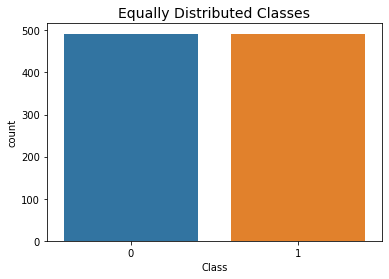

In [20]:
# Visualize equality

sb.countplot('Class', data=new_df)
plt.title('Equally Distributed Classes', fontsize=14)
plt.show()

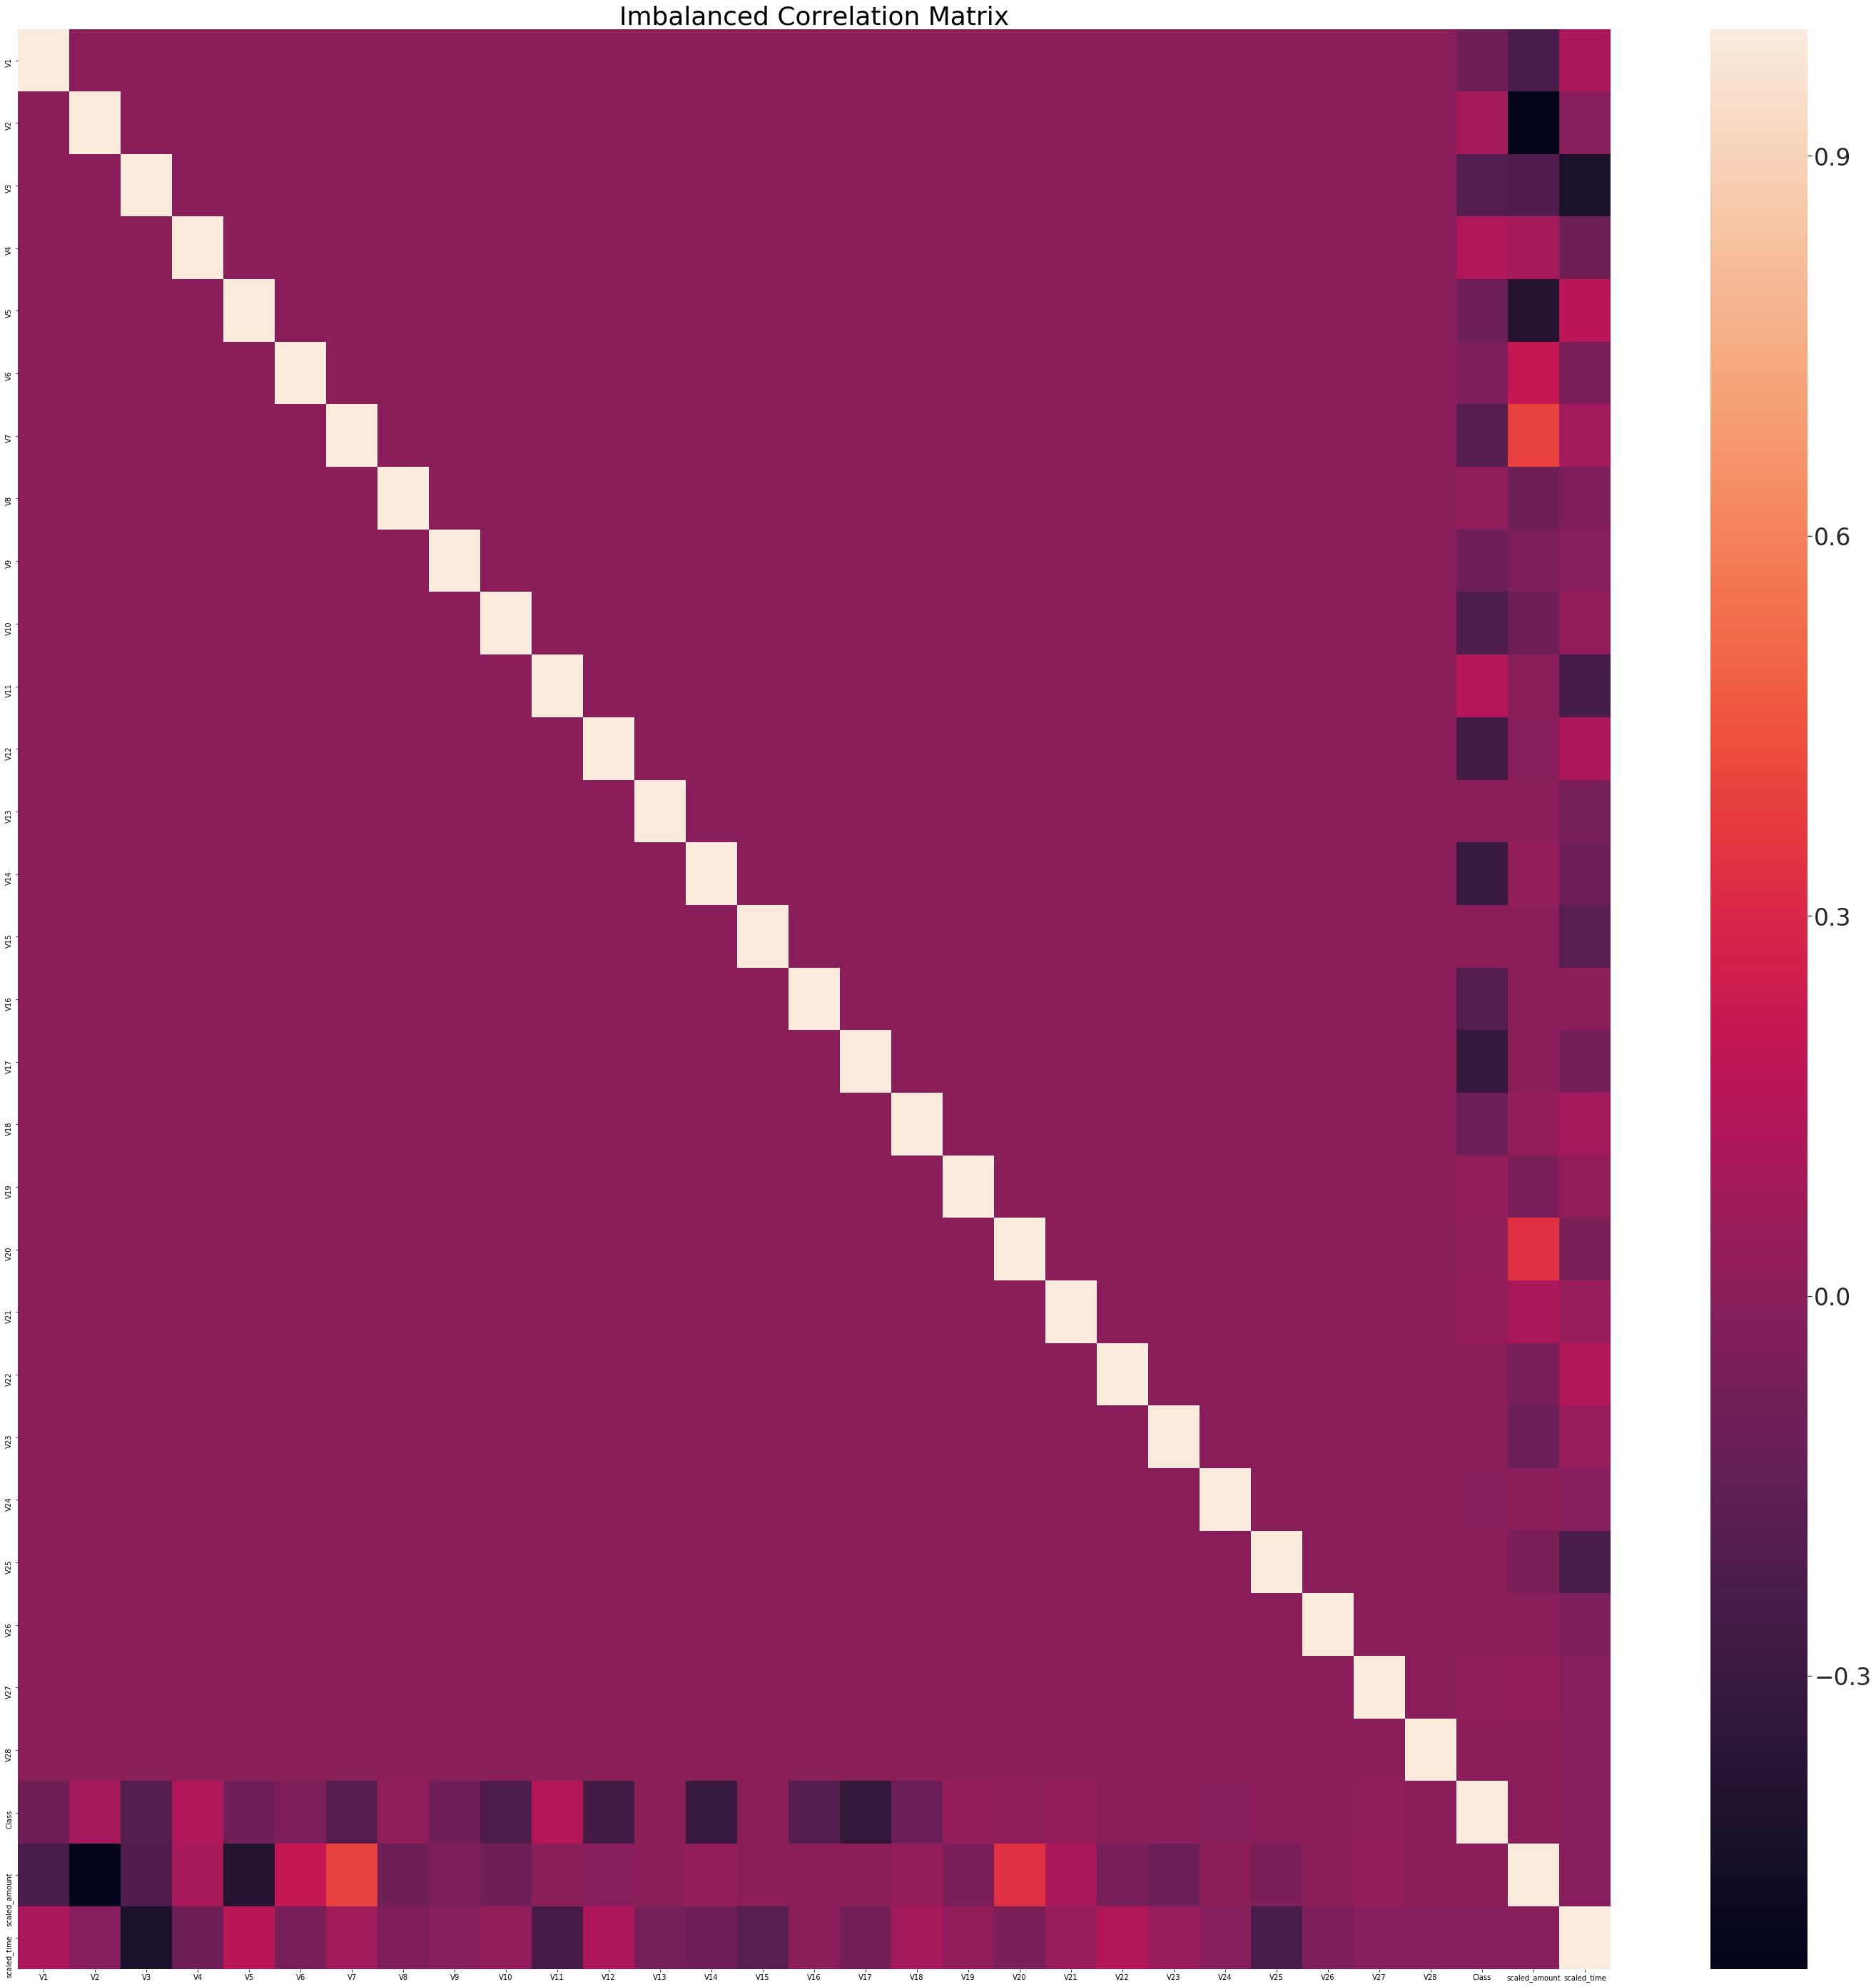

In [21]:
# heatmap of imbalanced dataframe
fig, ax = plt.subplots(figsize=(50,50))

corr = df.corr()
sb.set(font_scale=3)
sb.heatmap(data=corr, ax=ax, annot=False)
ax.set_title("Imbalanced Correlation Matrix")
plt.show()

Text(0.5, 1, 'SubSample Correlation Matrix')

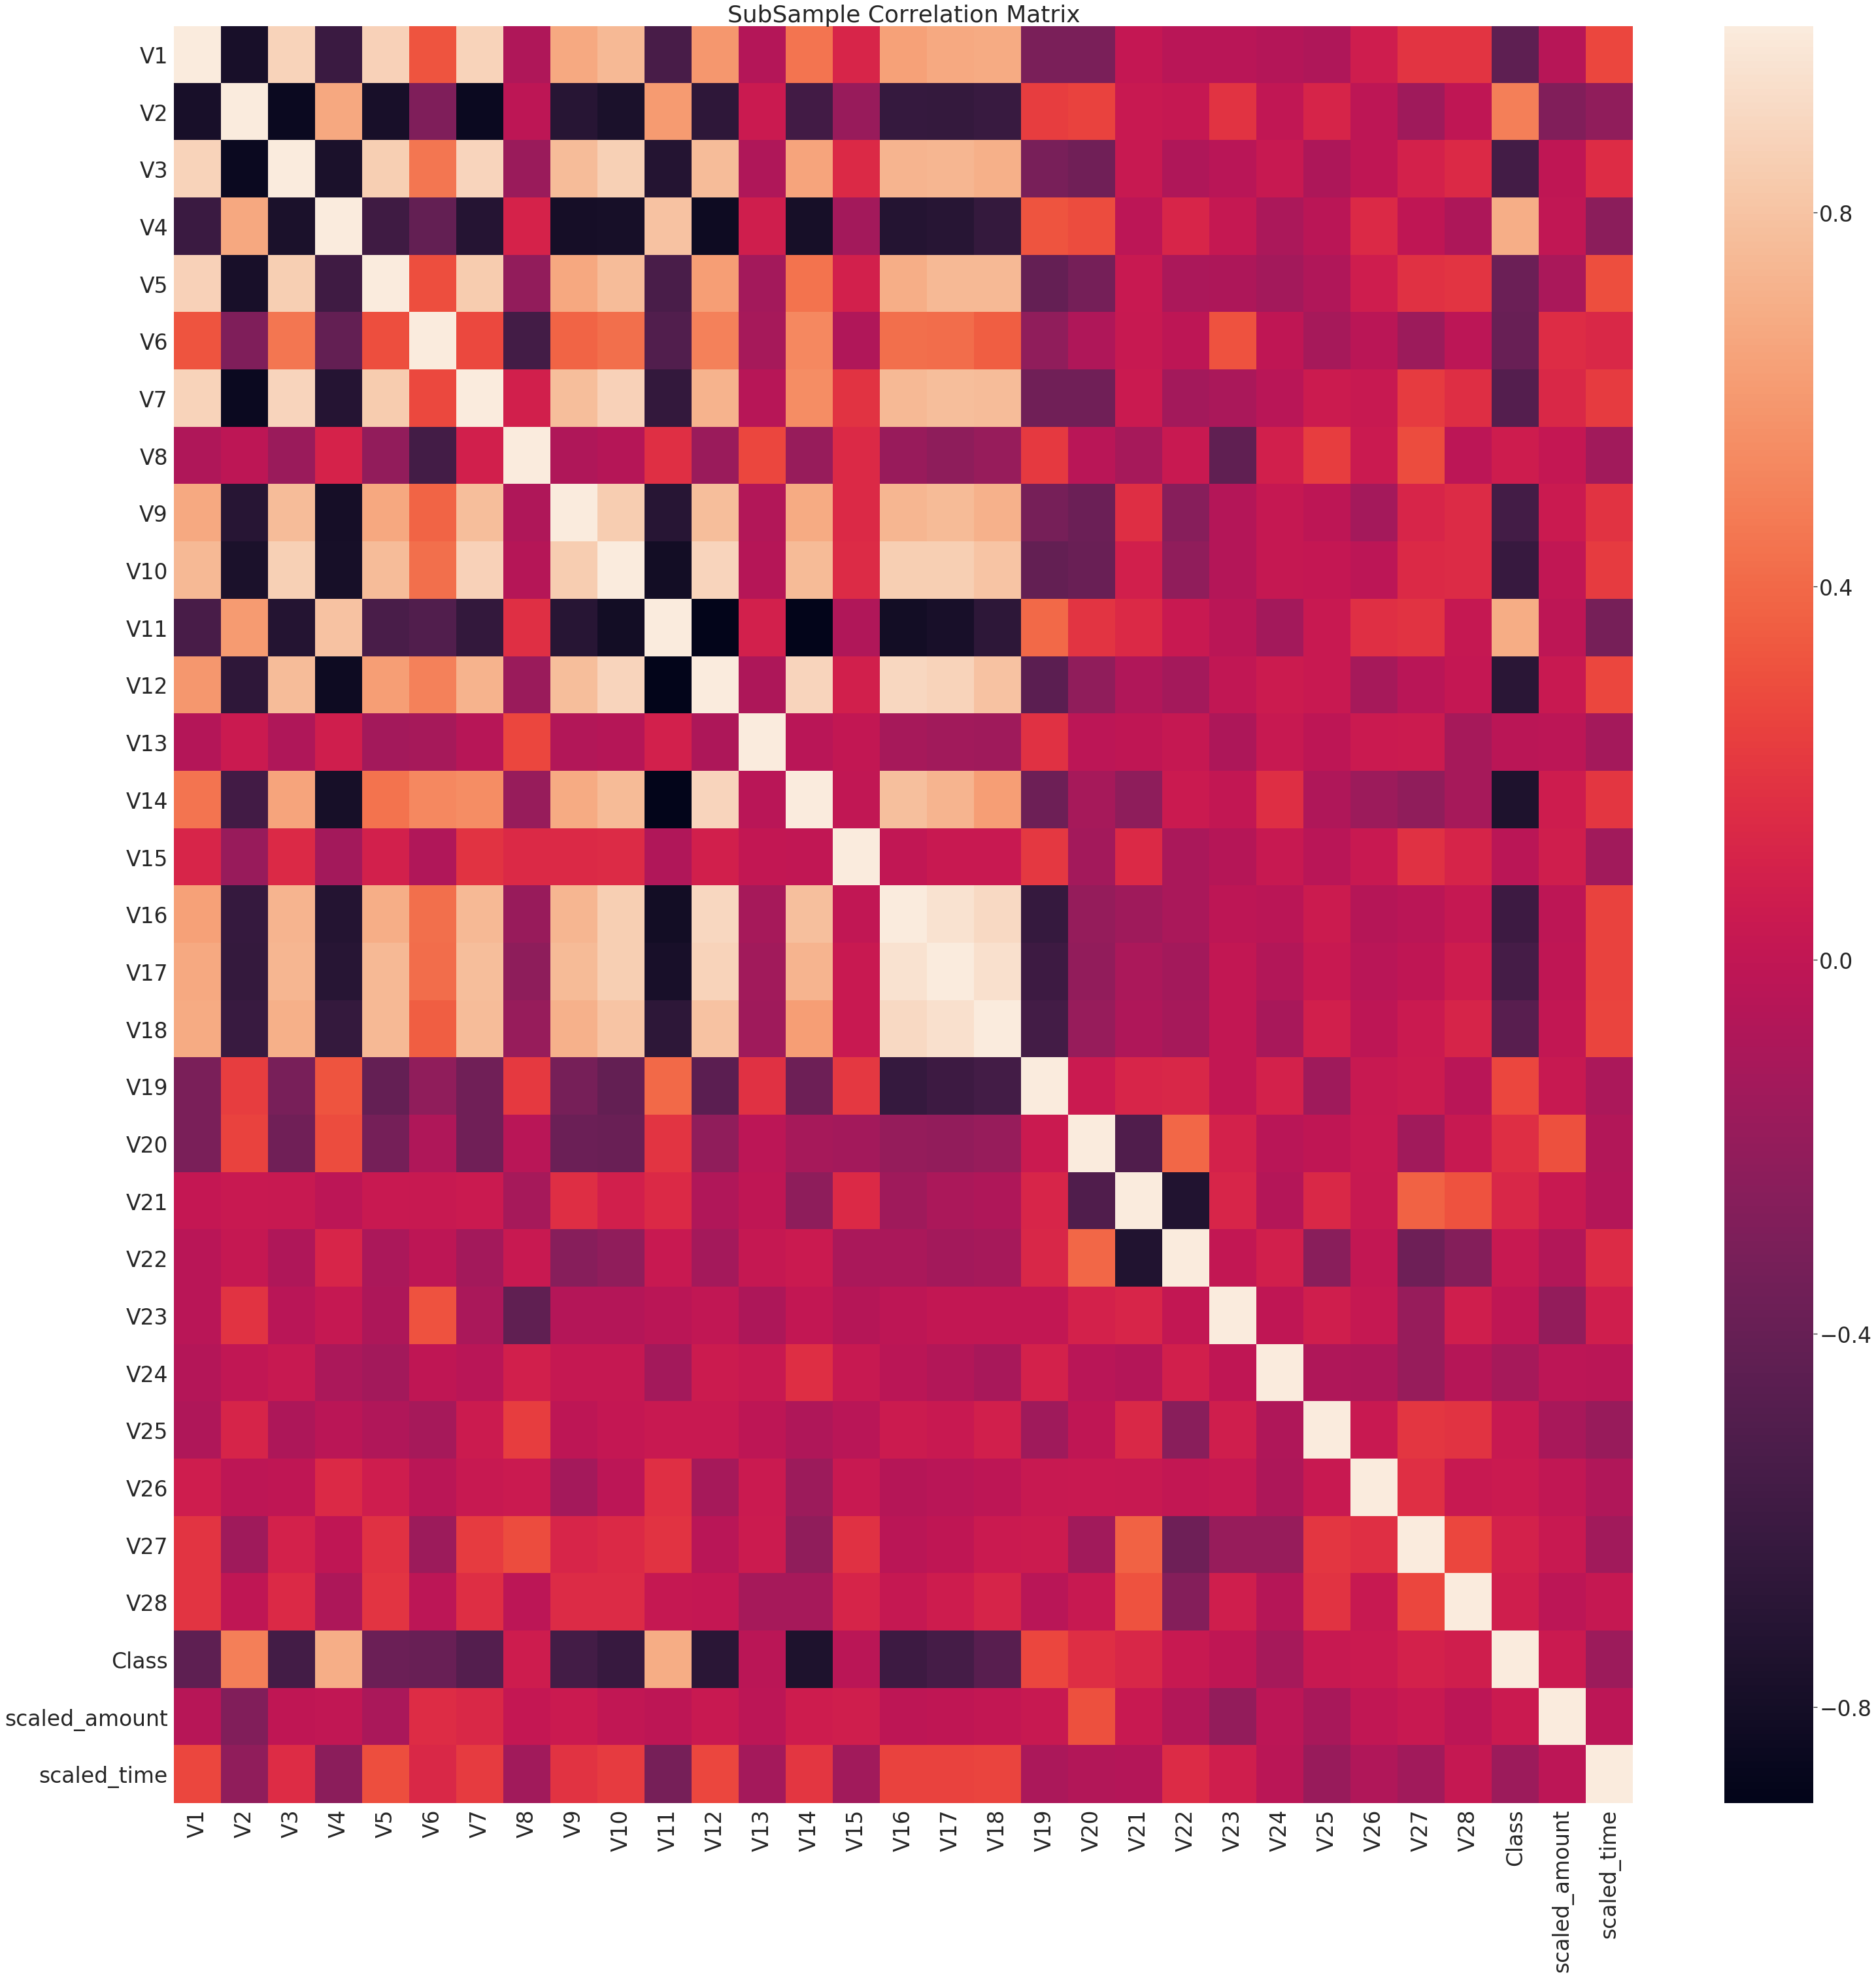

In [22]:
#subsample heatmap

fig, ax = plt.subplots(figsize=(50,50))
sub_sample_corr = new_df.corr()
sb.set(font_scale=3)
sb.heatmap(data=sub_sample_corr, ax=ax, annot=False)
ax.set_title('SubSample Correlation Matrix')

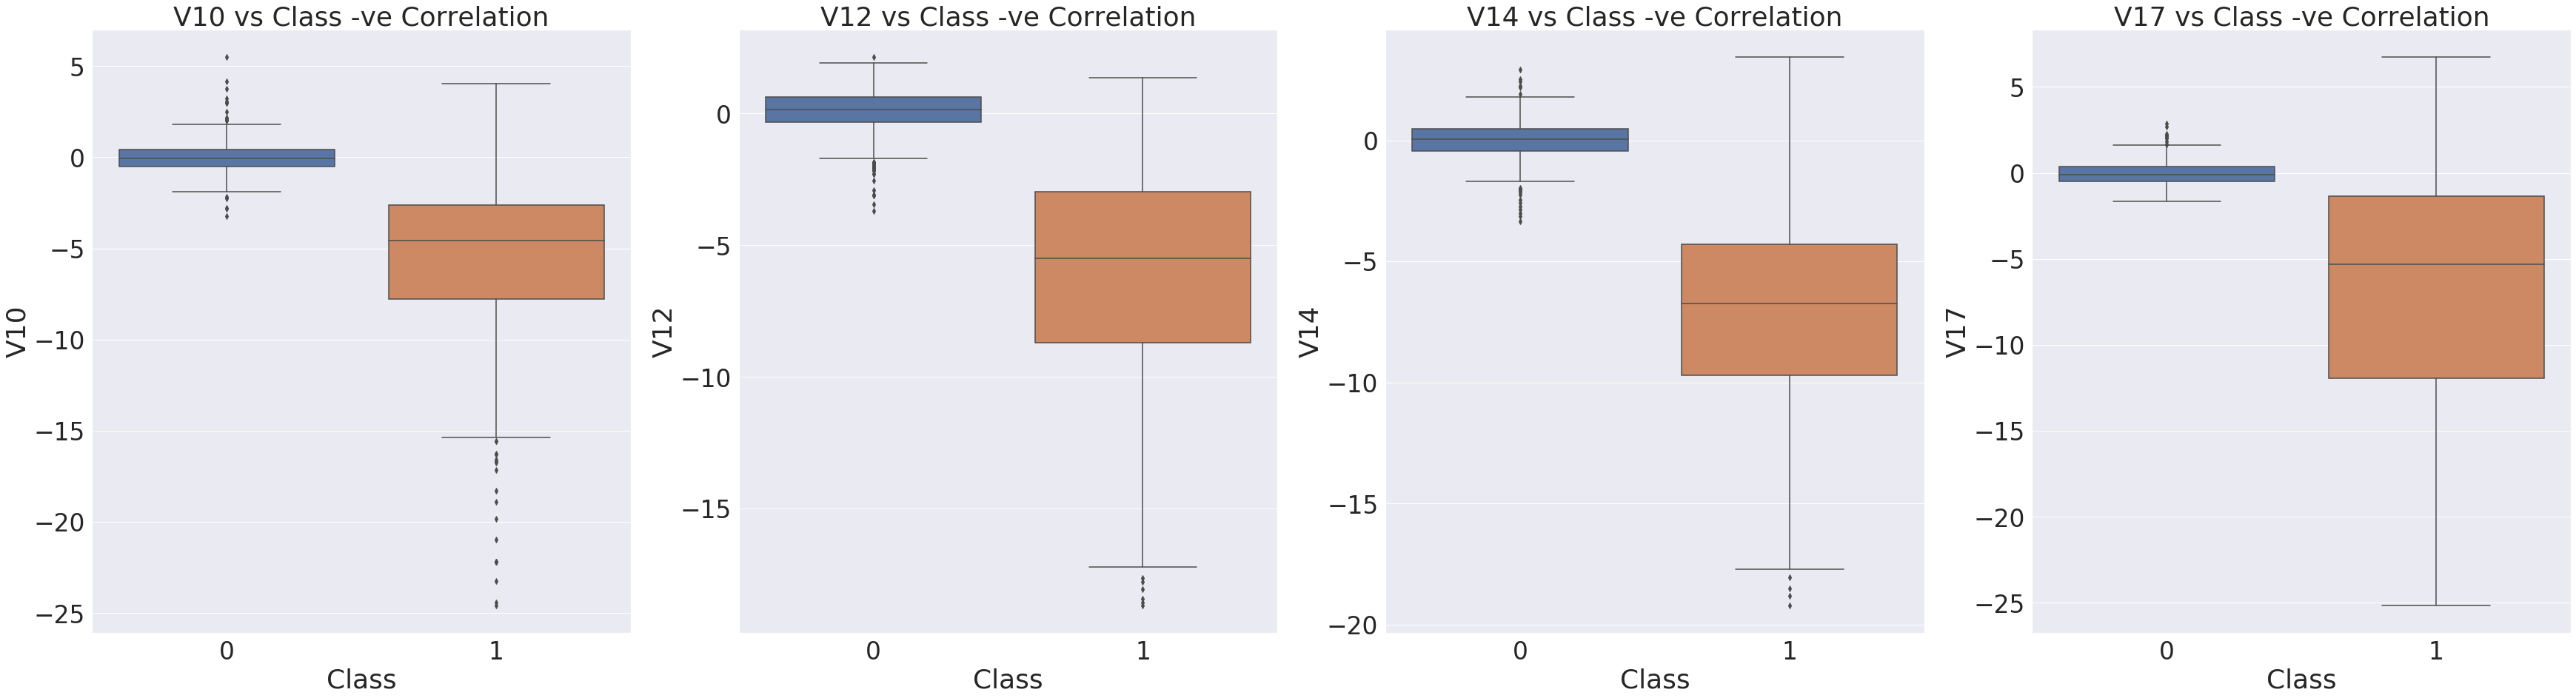

In [24]:
# Negative correlations => lower values = more likely to be F
f, axes = plt.subplots(ncols=4, figsize=(60,15))

sb.boxplot(x="Class", y="V10", data=new_df, ax=axes[0])
axes[0].set_title('V10 vs Class -ve Correlation')

sb.boxplot(x="Class", y="V12", data=new_df, ax=axes[1])
axes[1].set_title('V12 vs Class -ve Correlation')

sb.boxplot(x="Class", y="V14", data=new_df, ax=axes[2])
axes[2].set_title('V14 vs Class -ve Correlation')

sb.boxplot(x="Class", y="V17", data=new_df, ax=axes[3])
axes[3].set_title('V17 vs Class -ve Correlation')

plt.show()

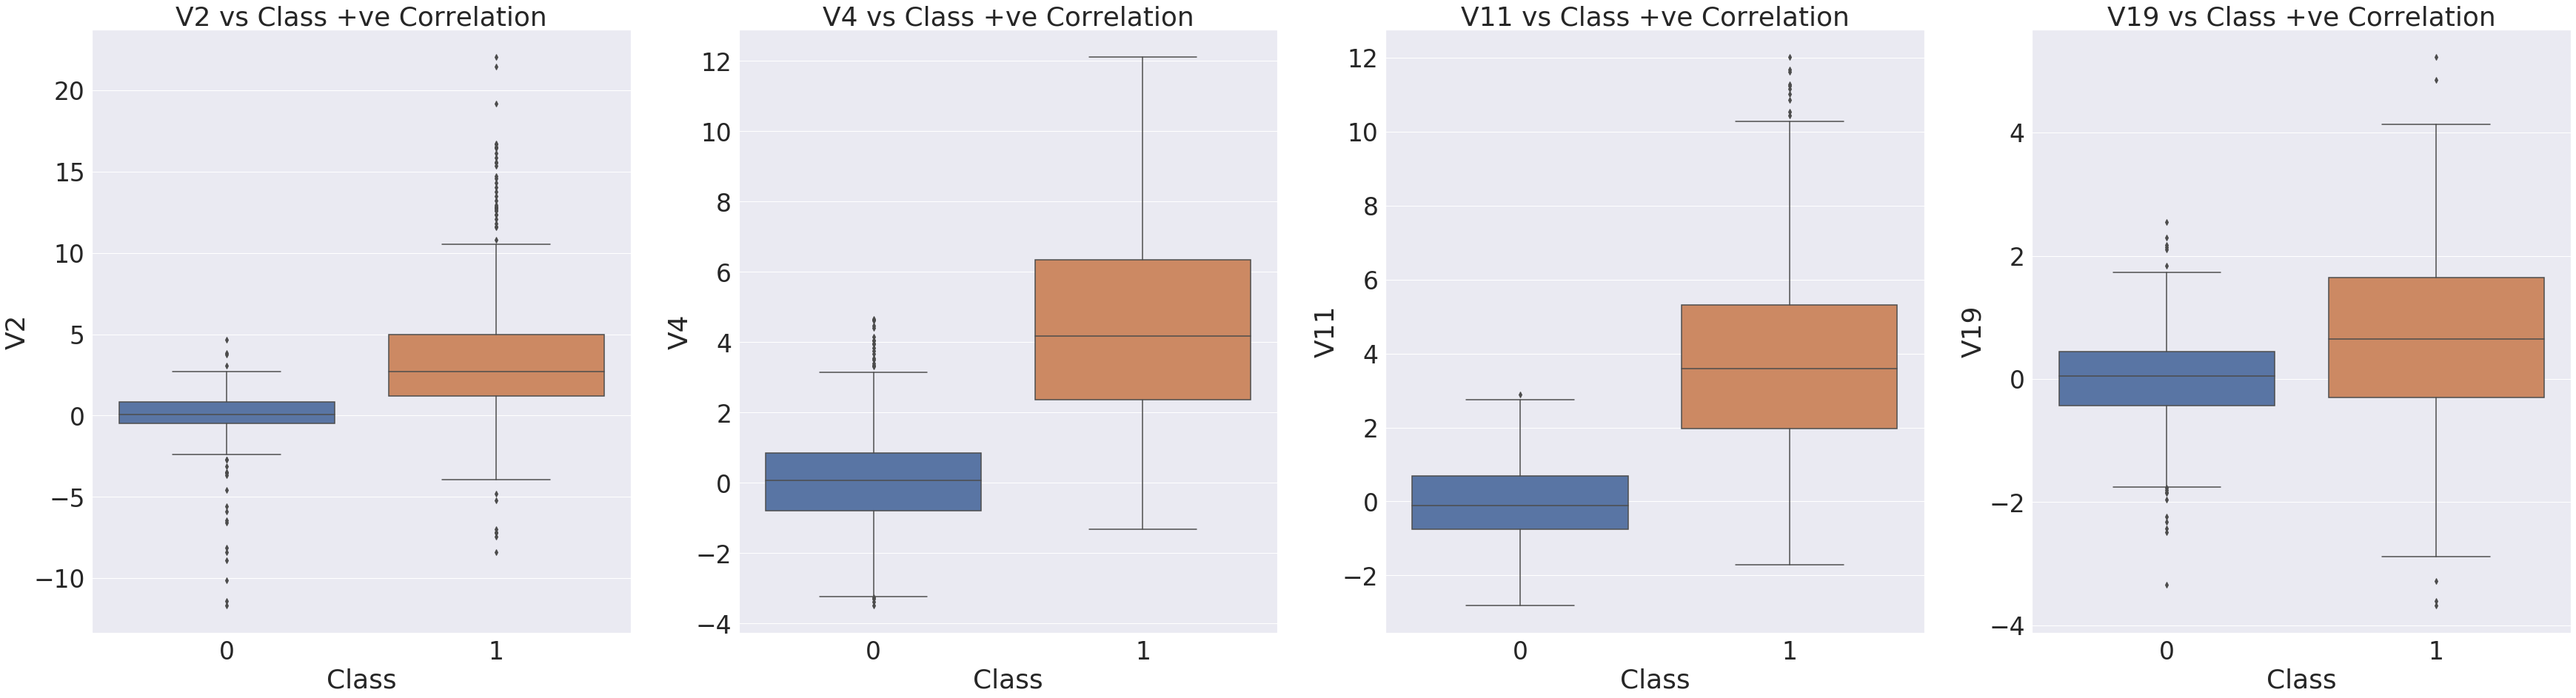

In [25]:
# Positive correlations => higher values = more likely to be F
fig, axes = plt.subplots(ncols=4, figsize=(60,15))

sb.boxplot(x="Class", y="V2", data=new_df, ax=axes[0])
axes[0].set_title('V2 vs Class +ve Correlation')

sb.boxplot(x="Class", y="V4", data=new_df, ax=axes[1])
axes[1].set_title('V4 vs Class +ve Correlation')

sb.boxplot(x="Class", y="V11", data=new_df, ax=axes[2])
axes[2].set_title('V11 vs Class +ve Correlation')

sb.boxplot(x="Class", y="V19", data=new_df, ax=axes[3])
axes[3].set_title('V19 vs Class +ve Correlation')

plt.show()


## [Remove Outliers] : Interquartile Range Method

In [26]:
## 1.5 is the factor of multiplication for threshold
#according to the IQR rule for outliers: https://www.thoughtco.com/what-is-the-interquartile-range-rule-3126244
## the lower the number, the more outliers are taken into consideration
## the higher, the lower outliers are taken into consideration
## 1.5 was used to lessen data loss and shift focus onto "extreme outliers"

# V12 removing outliers from fraud transactions
v12_fraud = new_df['V12'].loc[new_df['Class'] == 1].values
q25, q75 = np.percentile(v12_fraud, 25), np.percentile(v12_fraud, 75)
print('Quartile 25: {} | Quartile 75: {}'.format(q25, q75))

v12_iqr = q75 - q25

print('Interquartile Range (IQR): {}'.format(v12_iqr))

v12_cut_off = v12_iqr * 1.5

v12_lower, v12_upper = q25 - v12_cut_off, q75 + v12_cut_off

print('Cut Off: {}'.format(v12_cut_off))
print('V12 Lower: {}'.format(v12_lower))
print('V12 Upper: {}'.format(v12_upper))

outliers = [x for x in v12_fraud if x < v12_lower or x > v12_upper]

print('Feature V12 Outliers for Fraud Cases: {}'.format(len(outliers)))
print('V12 outliers: {}'.format(outliers))

new_df = new_df.drop(new_df[(new_df['V12'] > v12_upper) | (new_df['V12'] < v12_lower)].index)
print('Number of Instances after outliers removal: {}'.format(len(new_df)))


Quartile 25: -8.688176521812306 | Quartile 75: -2.9740880253849302
Interquartile Range (IQR): 5.714088496427376
Cut Off: 8.571132744641064
V12 Lower: -17.25930926645337
V12 Upper: 5.597044719256134
Feature V12 Outliers for Fraud Cases: 6
V12 outliers: [-17.7691434633638, -18.553697009645802, -18.047596570821604, -18.683714633344298, -17.631606313870698, -18.4311310279993]
Number of Instances after outliers removal: 978


In [27]:
#V14 Removing Outliers 

v14_fraud = new_df['V14'].loc[new_df['Class'] == 1].values
q25, q75 = np.percentile(v14_fraud, 25), np.percentile(v14_fraud, 75)
print('Quartile 25: {} | Quartile 75: {}'.format(q25, q75))

v14_iqr = q75 - q25

print('Interquartile Range (IQR): {}'.format(v14_iqr))

v14_cut_off = v14_iqr * 1.5

v14_lower, v14_upper = q25 - v14_cut_off, q75 + v14_cut_off

print('Cut Off: {}'.format(v14_cut_off))
print('V14 Lower: {}'.format(v14_lower))
print('V14 Upper: {}'.format(v14_upper))

outliers = [x for x in v14_fraud if x < v14_lower or x > v14_upper]

print('Feature V14 Outliers for Fraud Cases: {}'.format(len(outliers)))
print('V14 outliers:{}'.format(outliers))

new_df = new_df.drop(new_df[(new_df['V14'] > v14_upper) | (new_df['V14'] < v14_lower)].index)
print('Number of Instances after outliers removal: {}'.format(len(new_df)))

Quartile 25: -9.546412159574377 | Quartile 75: -4.256173215740009
Interquartile Range (IQR): 5.2902389438343675
Cut Off: 7.935358415751551
V14 Lower: -17.48177057532593
V14 Upper: 3.679185200011542
Feature V14 Outliers for Fraud Cases: 4
V14 outliers:[-17.7216383537133, -17.6206343516773, -18.4937733551053, -18.049997689859396]
Number of Instances after outliers removal: 974


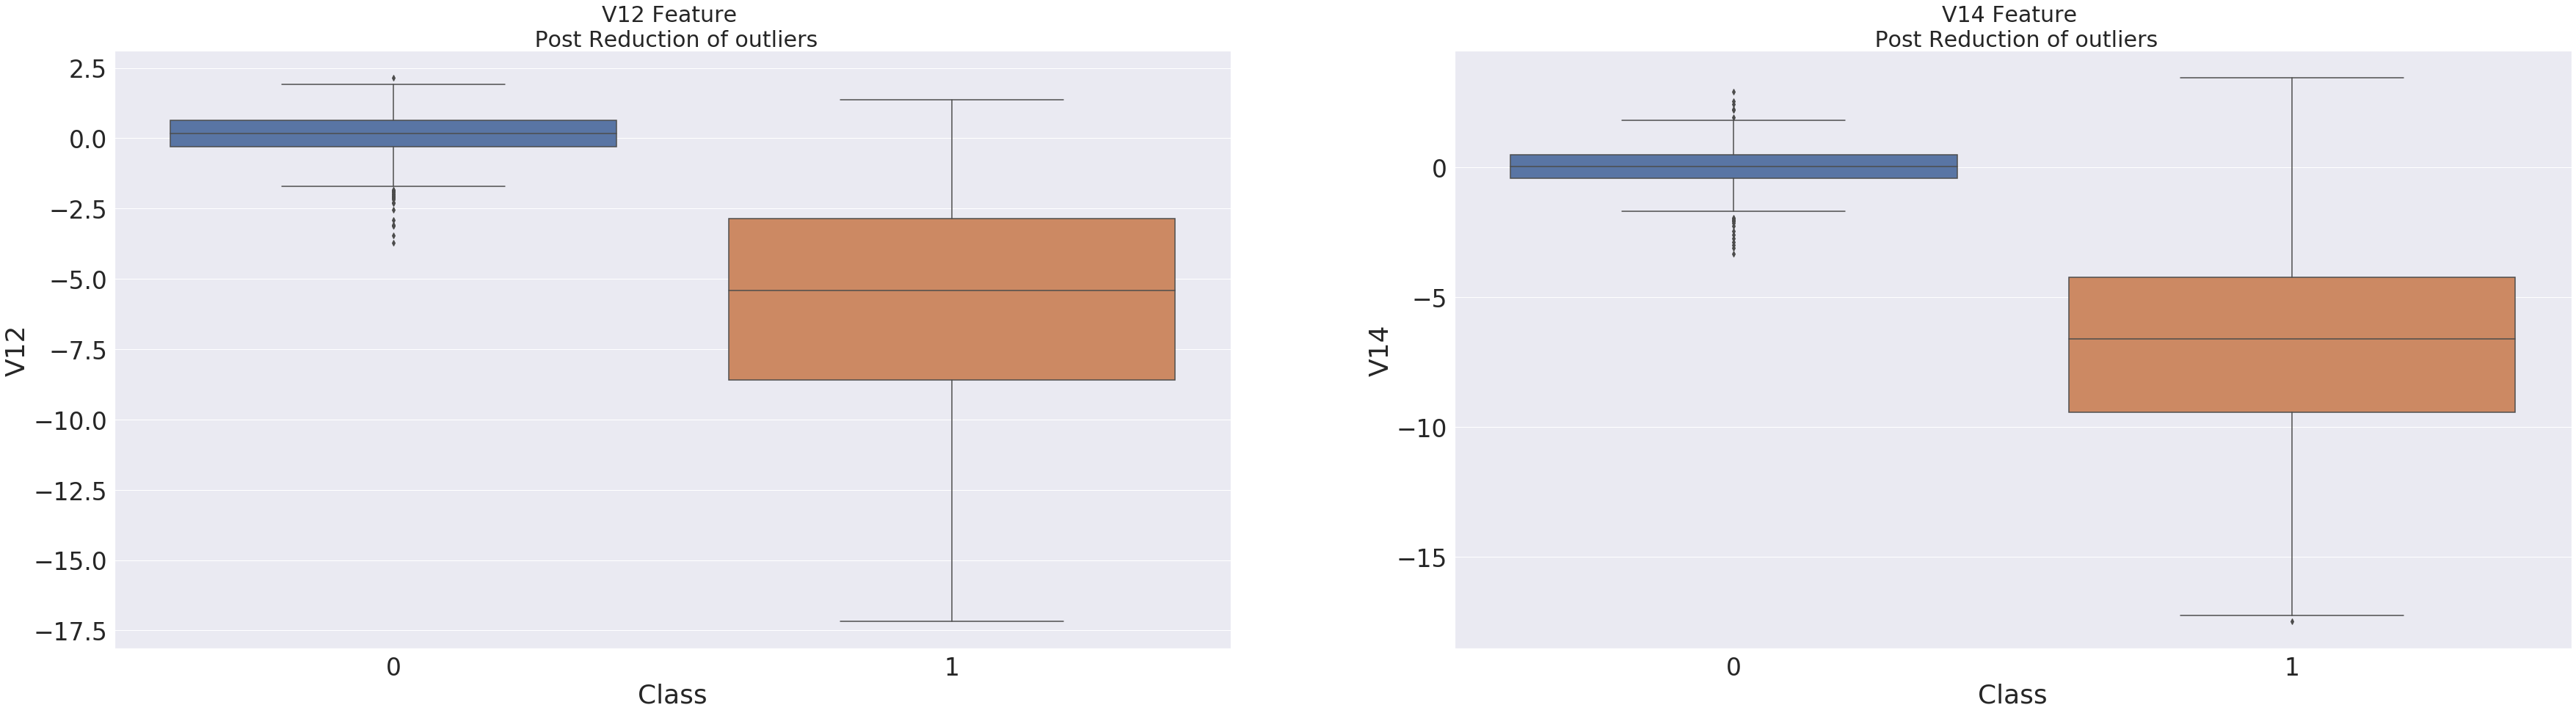

In [28]:
# Boxplots with outliers removed
f,(ax1, ax2) = plt.subplots(1, 2, figsize=(60,15))


# Feature 12
sb.boxplot(x="Class", y="V12", data=new_df, ax=ax1)
ax1.set_title("V12 Feature \n Post Reduction of outliers", fontsize=30)

# Feature V14
sb.boxplot(x="Class", y="V14", data=new_df,ax=ax2)
ax2.set_title("V14 Feature \n Post Reduction of outliers", fontsize=30)


plt.show()

## V12 & V14 show outliers reduction

## Dimensionality Reduction and Clustering

In [29]:
# source: https://towardsdatascience.com/visualising-high-dimensional-datasets-using-pca-and-t-sne-in-python-8ef87e7915b
#ref: https://www.youtube.com/watch?v=p3wFE85dAyY
# ref: https://medium.com/@paritosh_30025/curse-of-dimensionality-f4edb3efa6ec

## t0: start time
## t1: end time

# from random undersampling
features = new_df.drop('Class', axis=1)
label_class = new_df['Class']

# T-SNE Implementation
t0 = time.time()
features_reduced_tsne = TSNE(n_components=2, random_state=42).fit_transform(features.values)
t1 = time.time()
print("T-SNE took {:.2} s".format(t1 - t0))

# PCA Implementation
t0 = time.time()
features_reduced_pca = PCA(n_components=2, random_state=42).fit_transform(features.values)
t1 = time.time()
print("PCA took {:.2} s".format(t1 - t0))

# TruncatedSVD
t0 = time.time()
features_reduced_svd = TruncatedSVD(n_components=2, algorithm='randomized', random_state=42).fit_transform(features.values)
t1 = time.time()
print("Truncated SVD took {:.2} s".format(t1 - t0))

## shortest amount of time goes to T-SVD

T-SNE took 5.0 s
PCA took 0.13 s
Truncated SVD took 0.011 s


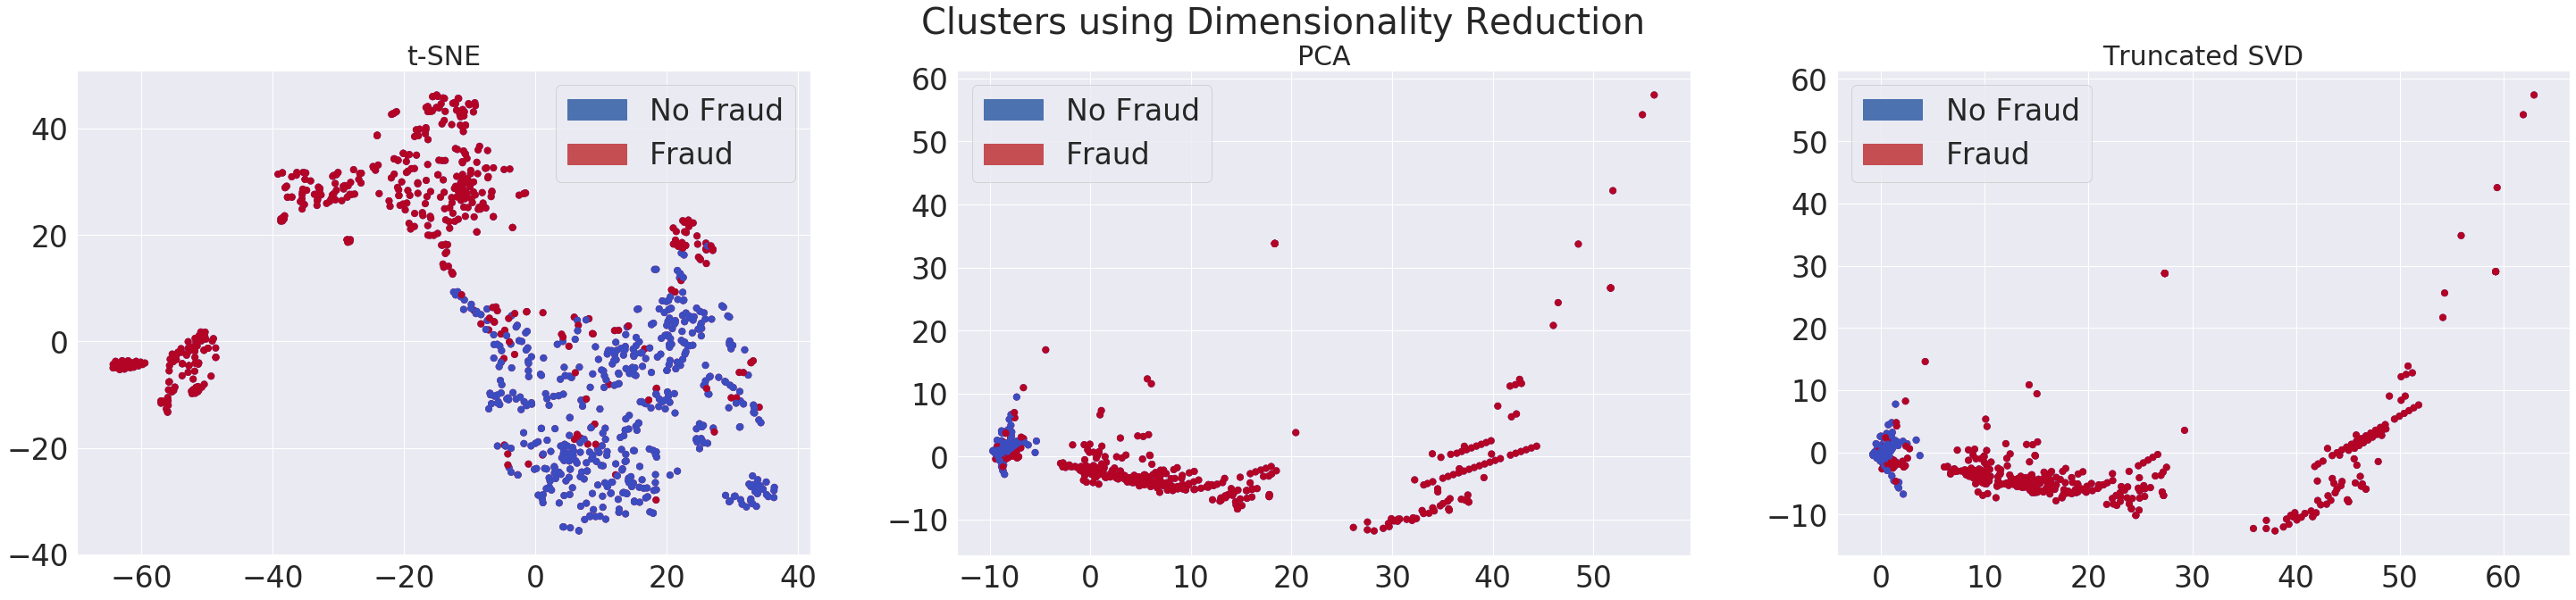

In [30]:
# Visualizing clustering plots for 3 dimensionality reduction methods

f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(50,10))

f.suptitle('Clusters using Dimensionality Reduction', fontsize=40)


nf_patch = mpatches.Patch(color='b', label='No Fraud')
f_patch = mpatches.Patch(color='r', label='Fraud')


# t-SNE scatter plot
ax1.scatter(features_reduced_tsne[:,0], features_reduced_tsne[:,1], c=(label_class == 0), cmap='coolwarm', label='Non Fraudulent', linewidths=2)
ax1.scatter(features_reduced_tsne[:,0], features_reduced_tsne[:,1], c=(label_class == 1),cmap='coolwarm', label='Fraudulent', linewidths=2)
ax1.set_title('t-SNE', fontsize=30)

ax1.grid(True)

ax1.legend(handles=[nf_patch, f_patch])


# PCA scatter plot
ax2.scatter(features_reduced_pca[:,0], features_reduced_pca[:,1], c=(label_class == 0), cmap='coolwarm', label='Non Fraudulent', linewidths=2)
ax2.scatter(features_reduced_pca[:,0], features_reduced_pca[:,1], c=(label_class == 1), cmap='coolwarm', label='Fraudulent', linewidths=2)
ax2.set_title('PCA', fontsize=30)

ax2.grid(True)

ax2.legend(handles=[nf_patch, f_patch])

# TruncatedSVD scatter plot
ax3.scatter(features_reduced_svd[:,0], features_reduced_svd[:,1], c=(label_class == 0), cmap='coolwarm', label='Non Fraudulent', linewidths=2)
ax3.scatter(features_reduced_svd[:,0], features_reduced_svd[:,1], c=(label_class == 1), cmap='coolwarm', label='Fraudulent', linewidths=2)
ax3.set_title('Truncated SVD', fontsize=30)

ax3.grid(True)

ax3.legend(handles=[nf_patch, f_patch])

plt.show()

## Classifiers Effectiveness in Undersampling

In [36]:
feature = new_df.drop('Class', axis=1)
label = new_df['Class']

In [37]:
# scaled data split into 0.8 train, 0.2 test
feature_train, feature_test, label_train, label_test = train_test_split(feature, label, test_size=0.2, random_state=42)

In [38]:
# transform to arrays
feature_train = feature_train.values
feature_test = feature_test.values
label_train = label_train.values
label_test = label_test.values

In [39]:
#comparison classifiers
classifiers = {
    "LogisiticRegression": LogisticRegression(),
    "KNearest": KNeighborsClassifier(),
    "Support Vector Classifier": SVC(),
    "DecisionTreeClassifier": DecisionTreeClassifier()
}

In [40]:
#cross-validation scores
for key, classifier in classifiers.items():
    classifier.fit(feature_train, label_train)
    training_score = cross_val_score(classifier, feature_train, label_train, cv=5) #k-folds = 5
    print("Classifiers: ", classifier.__class__.__name__, "Has a training score of", round(training_score.mean(), 2) * 100, "% accuracy score")

## Highest score => Logistic Regression    
    

Classifiers:  LogisticRegression Has a training score of 94.0 % accuracy score
Classifiers:  KNeighborsClassifier Has a training score of 93.0 % accuracy score
Classifiers:  SVC Has a training score of 93.0 % accuracy score
Classifiers:  DecisionTreeClassifier Has a training score of 90.0 % accuracy score


In [41]:
# search for optimum parameters for all classifiers
#ref: https://www.youtube.com/watch?v=Gol_qOgRqfA
#source: https://towardsdatascience.com/imbalanced-class-sizes-and-classification-models-a-cautionary-tale-part-2-cf371500d1b3

# Logistic Regression 
log_reg_params = {"penalty": ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}

grid_log_reg = GridSearchCV(LogisticRegression(), log_reg_params)
grid_log_reg.fit(feature_train, label_train)

# log logistic regression with the optimum parameters
log_reg = grid_log_reg.best_estimator_

# K-NNB
knnb_params = {"n_neighbors": list(range(2,5,1)), 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}

grid_knnb = GridSearchCV(KNeighborsClassifier(), knnb_params)
grid_knnb.fit(feature_train, label_train)

# log K-NNB with the optimum parameters
log_knnb = grid_knnb.best_estimator_

# Support Vector Classifier
svc_params = {'C': [0.5, 0.7, 0.9, 1], 'kernel': ['rbf', 'poly', 'sigmoid', 'linear']}
grid_svc = GridSearchCV(SVC(), svc_params)
grid_svc.fit(feature_train, label_train)

# log svc with the optimum parameters
log_svc = grid_svc.best_estimator_

# DecisionTree Classifier
tree_params = {"criterion": ["gini", "entropy"], "max_depth": list(range(2,4,1)), 
              "min_samples_leaf": list(range(5,7,1))}
grid_tree = GridSearchCV(DecisionTreeClassifier(), tree_params)
grid_tree.fit(feature_train, label_train)

# log DT with the optimum parameters
log_DT = grid_tree.best_estimator_


# Case: Overfitting (optimum parameters with & testing on new_df instead of df)
log_reg_score = cross_val_score(log_reg, feature_train, label_train, cv=5)
print('Logistic Regression Cross Validation Score: ', round(log_reg_score.mean() * 100, 2).astype(str) + '%')


knnb_score = cross_val_score(log_knnb, feature_train, label_train, cv=5)
print('KNN Cross Validation Score', round(knnb_score.mean() * 100, 2).astype(str) + '%')

svc_score = cross_val_score(log_svc, feature_train, label_train, cv=5)
print('Support Vector Machine Cross Validation Score', round(svc_score.mean() * 100, 2).astype(str) + '%')

tree_score = cross_val_score(log_DT, feature_train, label_train, cv=5)
print('DecisionTree Classifier Cross Validation Score', round(tree_score.mean() * 100, 2).astype(str) + '%')

Logistic Regression Cross Validation Score:  94.1%
Knears Neighbors Cross Validation Score 93.45%
Support Vector Classifier Cross Validation Score 93.84%
DecisionTree Classifier Cross Validation Score 91.65%


In [43]:
# imbalanced data => undersample during cross-validation

undersample_features = df.drop('Class', axis=1)
undersample_label = df['Class']


for train_index, test_index in skf.split(undersample_features, undersample_label):
    undersample_Ftrain, undersample_Ftest = undersample_features.iloc[train_index], undersample_features.iloc[test_index]
    undersample_Ltrain, undersample_Ltest = undersample_label.iloc[train_index], undersample_label.iloc[test_index]
    
undersample_Ftrain = undersample_Ftrain.values
undersample_Ftest = undersample_Ftest.values
undersample_Ltrain = undersample_Ltrain.values
undersample_Ltest = undersample_Ltest.values 

undersample_accuracy = []
undersample_precision = []
undersample_recall = []
undersample_f1 = []
undersample_auc = []


# Cross Validation

for train, test in skf.split(undersample_Ftrain, undersample_Ltrain):
    undersample_pipeline = make_pipeline(NearMiss(sampling_strategy='majority'), log_reg) 
    undersample_model = undersample_pipeline.fit(undersample_Ftrain[train], undersample_Ltrain[train])
    undersample_prediction = undersample_model.predict(undersample_Ftrain[test])
    
    undersample_accuracy.append(undersample_pipeline.score(original_Ftrain[test], original_Ltrain[test]))
    undersample_precision.append(precision_score(original_Ltrain[test], undersample_prediction))
    undersample_recall.append(recall_score(original_Ltrain[test], undersample_prediction))
    undersample_f1.append(f1_score(original_Ltrain[test], undersample_prediction))
    undersample_auc.append(roc_auc_score(original_Ltrain[test], undersample_prediction))

In [45]:
# plot learning curves for all classifiers
# wide gaps => overfitting i.e. high variance
#original function: https://scikit-learn.org/stable/auto_examples/model_selection/plot_learning_curve.html

def plot_learning_curve(estimator1, estimator2, estimator3, estimator4, F, L, ylim=None, cv=None, n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize=(50,25), sharey=True)
    
    if ylim is not None:
        plt.ylim(*ylim)
        
    # First Estimator
    train_sizes, train_scores, test_scores = learning_curve(estimator1, F, L, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    ax1.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="#ff9124")
    ax1.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="#2492ff")
    ax1.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    ax1.plot(train_sizes, test_scores_mean, 'o-', color="b", label="Cross-validation score")
    ax1.set_title("Logistic Regression Learning Curve", fontsize=30)
    ax1.set_xlabel('Training size (m)')
    ax1.set_ylabel('Score')
    ax1.grid(True)
    ax1.legend(loc="best")
    
    # Second Estimator 
    train_sizes, train_scores, test_scores = learning_curve(estimator2, F, L, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    ax2.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="#ff9124")
    ax2.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="#2492ff")
    ax2.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    ax2.plot(train_sizes, test_scores_mean, 'o-', color="b", label="Cross-validation score")
    ax2.set_title("K-NNBs Learning Curve", fontsize=30)
    ax2.set_xlabel('Training size (m)')
    ax2.set_ylabel('Score')
    ax2.grid(True)
    ax2.legend(loc="best")
    
    # Third Estimator
    train_sizes, train_scores, test_scores = learning_curve(estimator3, F, L, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    ax3.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="#ff9124")
    ax3.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="#2492ff")
    ax3.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    ax3.plot(train_sizes, test_scores_mean, 'o-', color="b", label="Cross-validation score")
    ax3.set_title("Support Vector Classifier Learning Curve", fontsize=30)
    ax3.set_xlabel('Training size (m)')
    ax3.set_ylabel('Score')
    ax3.grid(True)
    ax3.legend(loc="best")
    
    # Fourth Estimator
    train_sizes, train_scores, test_scores = learning_curve(estimator4, F, L, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    ax4.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="#ff9124")
    ax4.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="#2492ff")
    ax4.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    ax4.plot(train_sizes, test_scores_mean, 'o-', color="b", label="Cross-validation score")
    ax4.set_title("Decision Tree Classifier Learning Curve", fontsize=30)
    ax4.set_xlabel('Training size (m)')
    ax4.set_ylabel('Score')
    ax4.grid(True)
    ax4.legend(loc="best")
    return plt

<module 'matplotlib.pyplot' from '/home/svfx/.local/lib/python3.6/site-packages/matplotlib/pyplot.py'>

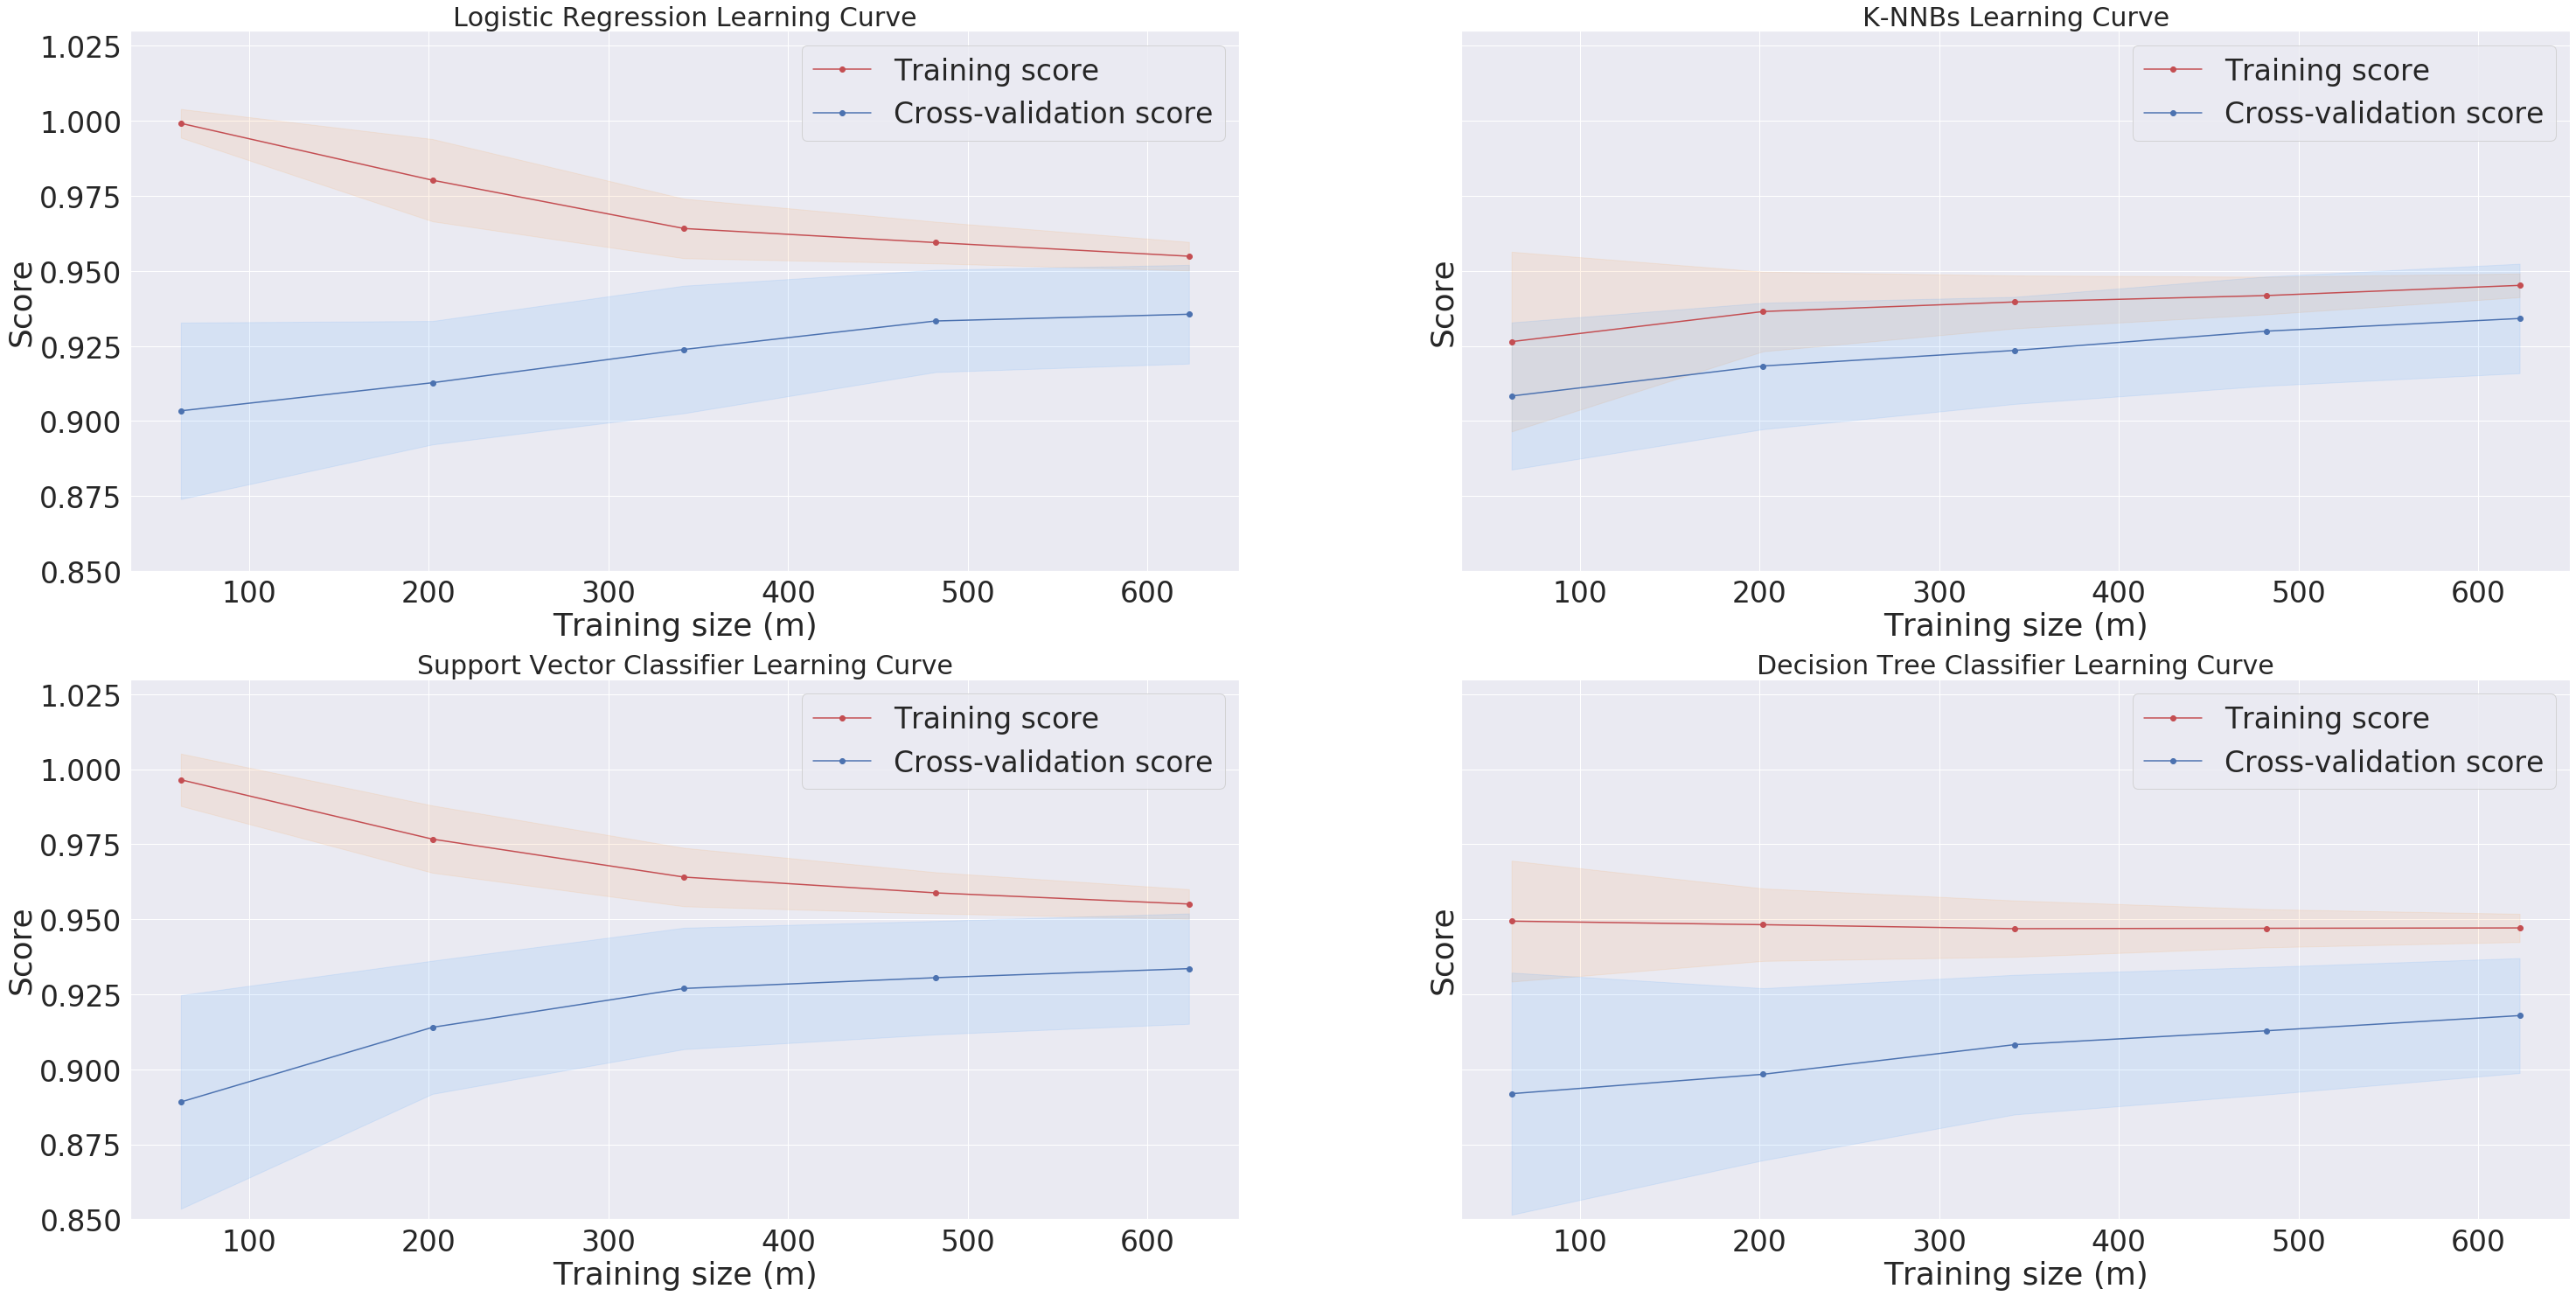

In [46]:
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=42)
plot_learning_curve(log_reg, log_knnb, log_svc, log_DT, feature_train, label_train, (0.85, 1.03), cv=cv, n_jobs=4)

In [48]:
# cross-validate predictions

log_reg_pred = cross_val_predict(log_reg, feature_train, label_train, cv=5, method="decision_function")

knnb_pred = cross_val_predict(log_knnb, feature_train, label_train, cv=5)

svc_pred = cross_val_predict(log_svc, feature_train, label_train, cv=5,method="decision_function")

tree_pred = cross_val_predict(log_DT, feature_train, label_train, cv=5)


print('Logistic Regression: ', roc_auc_score(label_train, log_reg_pred))
print('KNN: ', roc_auc_score(label_train, knnb_pred))
print('Support Vector Classifier: ', roc_auc_score(label_train, svc_pred))
print('Decision Tree Classifier: ', roc_auc_score(label_train, tree_pred))

Logistic Regression:  0.9712873245006921
KNN:  0.93445718805616
Support Vector Classifier:  0.9712939160239931
Decision Tree Classifier:  0.9216366752356471


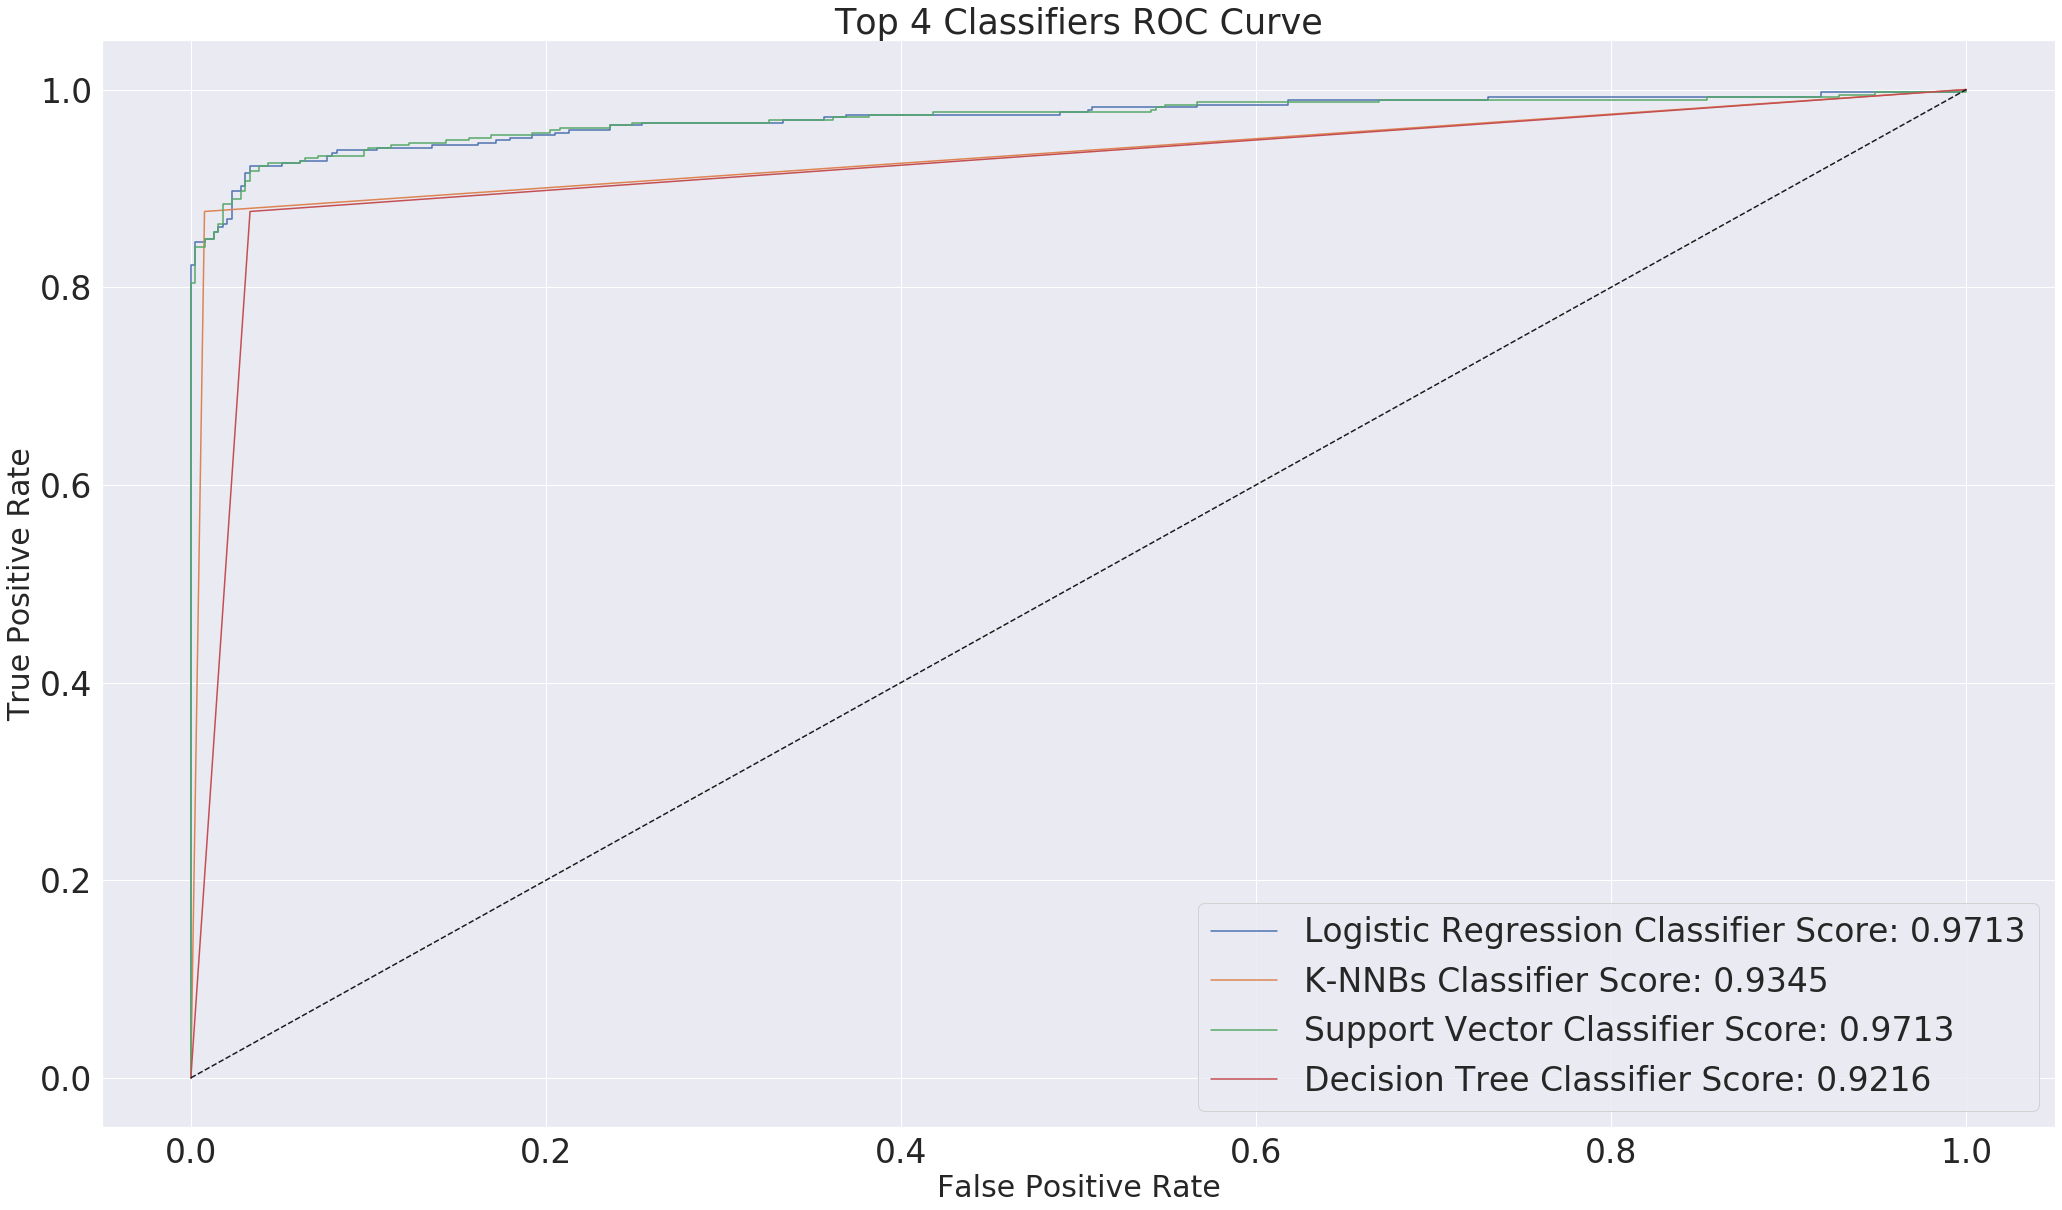

In [49]:
# fpr = false positive rate
# tpr = true positive rate
# roc = Receiving Operating Characteristic score

log_fpr, log_tpr, log_thresold = roc_curve(label_train, log_reg_pred)
knnb_fpr, knnb_tpr, knnb_threshold = roc_curve(label_train, knnb_pred)
svc_fpr, svc_tpr, svc_threshold = roc_curve(label_train, svc_pred)
tree_fpr, tree_tpr, tree_threshold = roc_curve(label_train, tree_pred)


def graph_roc_curve_multiple(log_fpr, log_tpr, knear_fpr, knear_tpr, svc_fpr, svc_tpr, tree_fpr, tree_tpr):
    plt.figure(figsize=(35,20))
    plt.title('Top 4 Classifiers ROC Curve', fontsize=35)
    plt.plot(log_fpr, log_tpr, label='Logistic Regression Classifier Score: {:.4f}'.format(roc_auc_score(label_train, log_reg_pred)))
    plt.plot(knnb_fpr, knnb_tpr, label='K-NNBs Classifier Score: {:.4f}'.format(roc_auc_score(label_train, knnb_pred)))
    plt.plot(svc_fpr, svc_tpr, label='Support Vector Classifier Score: {:.4f}'.format(roc_auc_score(label_train, svc_pred)))
    plt.plot(tree_fpr, tree_tpr, label='Decision Tree Classifier Score: {:.4f}'.format(roc_auc_score(label_train, tree_pred)))
    plt.plot([0, 1], [0, 1], 'k--') # minimum ROC score of 50%
    plt.xlabel('False Positive Rate', fontsize=30)
    plt.ylabel('True Positive Rate', fontsize=30)
    plt.legend()
    
graph_roc_curve_multiple(log_fpr, log_tpr, knnb_fpr, knnb_tpr, svc_fpr, svc_tpr, tree_fpr, tree_tpr)
plt.show()

## very close results between LR and SVM

## Logistic Regression

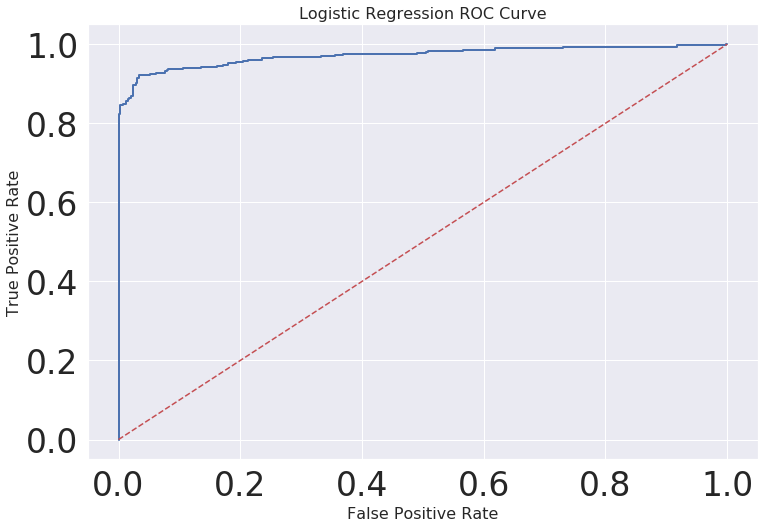

In [50]:
def logistic_roc_curve(log_fpr, log_tpr):
    plt.figure(figsize=(12,8))
    plt.title('Logistic Regression ROC Curve', fontsize=16)
    plt.plot(log_fpr, log_tpr, 'b-', linewidth=2)
    plt.plot([0, 1], [0, 1], 'r--')
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
  
logistic_roc_curve(log_fpr, log_tpr)
plt.show()

In [51]:
precision, recall, threshold = precision_recall_curve(label_train, log_reg_pred)

label_pred = log_reg.predict(feature_train)

In [52]:
print('Oversampling Scores:')
print('Recall Score: {:.2f}'.format(recall_score(label_train, label_pred)))
print('Precision Score: {:.2f}'.format(precision_score(label_train, label_pred)))
print('F1 Score: {:.2f}'.format(f1_score(label_train, label_pred)))
print('Accuracy Score: {:.2f}'.format(accuracy_score(label_train, label_pred)))

print ('\n')

print('Undersampling Scores:')
print("Accuracy Score: {:.2f}".format(np.mean(undersample_accuracy)))
print("Precision Score: {:.2f}".format(np.mean(undersample_precision)))
print("Recall Score: {:.2f}".format(np.mean(undersample_recall)))
print("F1 Score: {:.2f}".format(np.mean(undersample_f1)))

Oversampling Scores:
Recall Score: 0.96
Precision Score: 0.66
F1 Score: 0.78
Accuracy Score: 0.73


Undersampling Scores:
Accuracy Score: 0.52
Precision Score: 0.00
Recall Score: 0.43
F1 Score: 0.00


In [53]:
#average precision recall
undersample_L_score = log_reg.decision_function(original_Ftest)

undersample_average_precision = average_precision_score(original_Ltest, undersample_L_score)

print('Average precision-recall score: {0:0.2f}'.format(undersample_average_precision))

Average precision-recall score: 0.01


Text(0.5, 1.0, 'UnderSampling Precision-Recall curve: \n Average Precision-Recall Score =0.01')

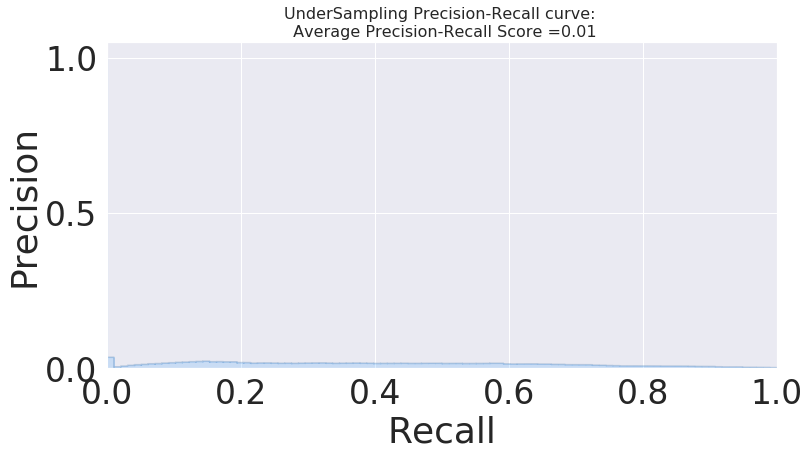

In [54]:
# visualization of undersampling precision-recall curve
fig = plt.figure(figsize=(12,6))

precision, recall, _ = precision_recall_curve(original_Ltest, undersample_L_score)

plt.step(recall, precision, color='#004a93', alpha=0.2,where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2,color='#48a6ff')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('UnderSampling Precision-Recall curve: \n Average Precision-Recall Score ={0:0.2f}'.format(undersample_average_precision), fontsize=16)

## Oversampling during cross-validation

In [55]:
# oversampling scores

accuracy_arr = []
precision_arr = []
recall_arr = []
f1_arr = []
auc_arr = []


log_reg_params = {"penalty": ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}

rand_log_reg = RandomizedSearchCV(LogisticRegression(), log_reg_params, n_iter=4)

for train, test in skf.split(original_Ftrain, original_Ltrain):
    pipeline = make_pipeline(SMOTE(sampling_strategy='minority'), rand_log_reg) 
    model = pipeline.fit(original_Ftrain[train], original_Ltrain[train])
    best_est = rand_log_reg.best_estimator_
    prediction = best_est.predict(original_Ftrain[test])
    
    accuracy_arr.append(pipeline.score(original_Ftrain[test], original_Ltrain[test]))
    precision_arr.append(precision_score(original_Ltrain[test], prediction))
    recall_arr.append(recall_score(original_Ltrain[test], prediction))
    f1_arr.append(f1_score(original_Ltrain[test], prediction))
    auc_arr.append(roc_auc_score(original_Ltrain[test], prediction))
    
    
    
    
print("accuracy: {}".format(np.mean(accuracy_arr)))
print("precision: {}".format(np.mean(precision_arr)))
print("recall: {}".format(np.mean(recall_arr)))
print("f1: {}".format(np.mean(f1_arr)))

## takes a lot of time due to no eliminations as done earlier in subsampling/undersampling

accuracy: 0.9485579045997727
precision: 0.061122105577311736
recall: 0.9162934112301201
f1: 0.1128403406207646


In [56]:
labels = ['Real', 'Fraudulent']
smote_prediction = best_est.predict(original_Ftest)
print(classification_report(original_Ltest, smote_prediction, target_names=labels))

              precision    recall  f1-score   support

        Real       1.00      0.99      0.99     56863
  Fraudulent       0.11      0.86      0.20        98

    accuracy                           0.99     56961
   macro avg       0.56      0.92      0.60     56961
weighted avg       1.00      0.99      0.99     56961



In [57]:
# precision-recall score for oversampling
L_score = best_est.decision_function(original_Ftest)
average_precision = average_precision_score(original_Ltest, L_score)

print('Average precision-recall score: {0:0.2f}'.format(average_precision))

Average precision-recall score: 0.75


Text(0.5, 1.0, 'OverSampling Precision-Recall curve: \n Average Precision-Recall Score =0.75')

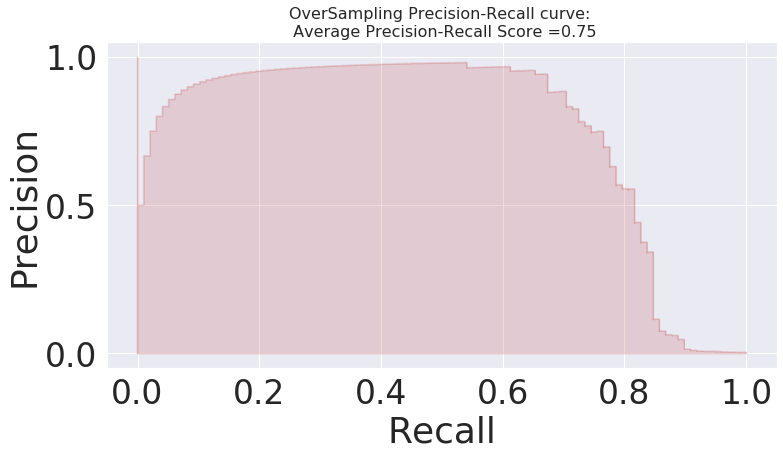

In [58]:
# visualization of oversampling
fig = plt.figure(figsize=(12,6))

precision, recall, _ = precision_recall_curve(original_Ltest, L_score)

plt.step(recall, precision, color='r', alpha=0.2,where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2, color='r')

plt.xlabel('Recall')
plt.ylabel('Precision')

plt.title('OverSampling Precision-Recall curve: \n Average Precision-Recall Score ={0:0.2f}'.format(average_precision), fontsize=16)

## SMOTE Technique post Split & Cross-Validation

In [59]:
smote = SMOTE(sampling_strategy='minority', random_state=42)

Fsm_train, Lsm_train = smote.fit_sample(original_Ftrain, original_Ltrain)

t0 = time.time()
log_reg_sm = grid_log_reg.best_estimator_
log_reg_sm.fit(Fsm_train, Lsm_train)
t1 = time.time()
print("Fitting oversample data time :{}s".format(t1 - t0))

Fitting oversample data time :10.885925054550171s


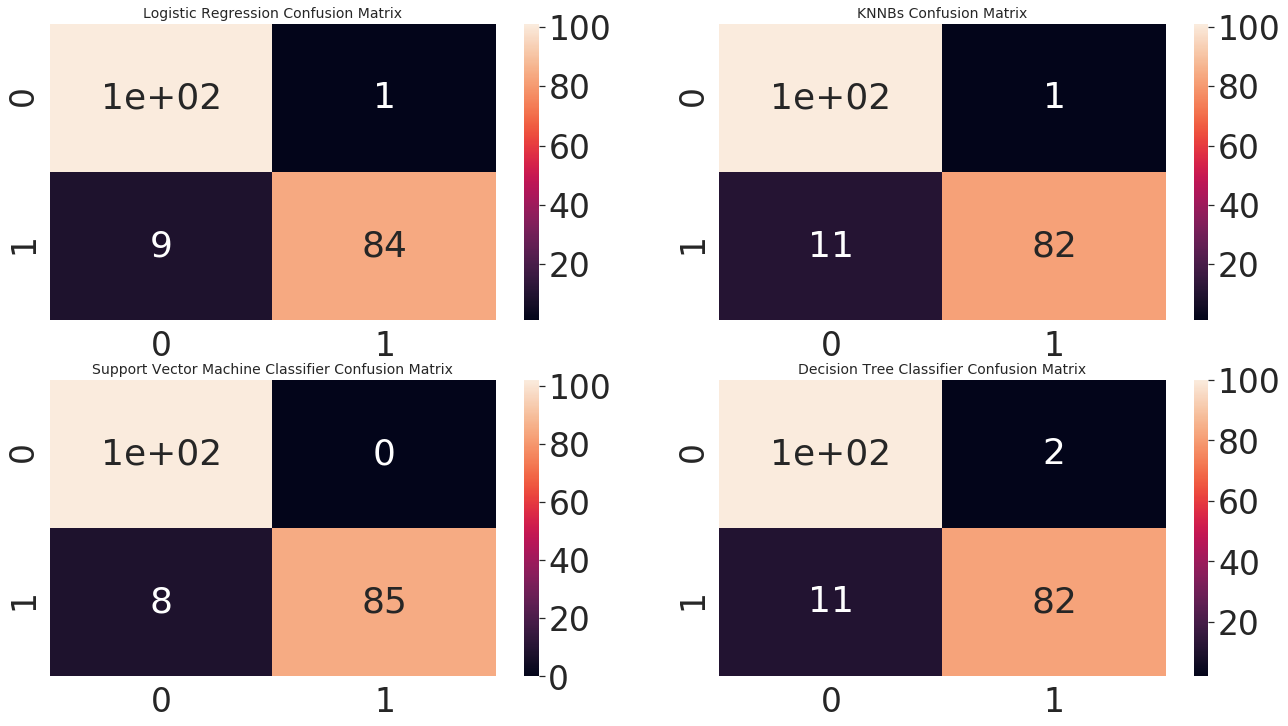

In [60]:
# SMOTE in LR
L_pred_reg = log_reg_sm.predict(feature_test)

# other classifiers in undersampling
L_pred_knnb = log_knnb.predict(feature_test)
L_pred_svc = log_svc.predict(feature_test)
L_pred_tree = log_DT.predict(feature_test)

log_reg_cm = confusion_matrix(label_test, L_pred_reg)
knnb_cm = confusion_matrix(label_test, L_pred_knnb)
svc_cm = confusion_matrix(label_test, L_pred_svc)
tree_cm = confusion_matrix(label_test, L_pred_tree)

# Visualize Confusion Matrices
fig, ax = plt.subplots(2, 2,figsize=(22,12))


sb.heatmap(log_reg_cm, ax=ax[0][0], annot=True)
ax[0, 0].set_title("Logistic Regression Confusion Matrix", fontsize=14)


sb.heatmap(knnb_cm, ax=ax[0][1], annot=True)
ax[0][1].set_title("KNNBs Confusion Matrix", fontsize=14)


sb.heatmap(svc_cm, ax=ax[1][0], annot=True)
ax[1][0].set_title("Support Vector Machine Classifier Confusion Matrix", fontsize=14)


sb.heatmap(tree_cm, ax=ax[1][1], annot=True)
ax[1][1].set_title("Decision Tree Classifier Confusion Matrix", fontsize=14)



plt.show()

# where:
# 00 => True Negative : rightfully classifed as non-fraudulent
# 10 => False Negative : wrongfully classified as non-fraudulent
# 01 => False Positive : wrongfully classified as fraudulent
# 11 => True Positive : rightfully classified as fraudulent

## highest true positive => LR

In [61]:
# classification reports for all classifiers 

print('LR:', classification_report(label_test, L_pred_reg))

print('KNN:', classification_report(label_test, L_pred_knnb))

print('SVM:', classification_report(label_test, L_pred_svc))

print('DT:', classification_report(label_test, L_pred_tree))


LR:               precision    recall  f1-score   support

           0       0.92      0.99      0.95       102
           1       0.99      0.90      0.94        93

    accuracy                           0.95       195
   macro avg       0.95      0.95      0.95       195
weighted avg       0.95      0.95      0.95       195

KNN:               precision    recall  f1-score   support

           0       0.90      0.99      0.94       102
           1       0.99      0.88      0.93        93

    accuracy                           0.94       195
   macro avg       0.94      0.94      0.94       195
weighted avg       0.94      0.94      0.94       195

SVM:               precision    recall  f1-score   support

           0       0.93      1.00      0.96       102
           1       1.00      0.91      0.96        93

    accuracy                           0.96       195
   macro avg       0.96      0.96      0.96       195
weighted avg       0.96      0.96      0.96       195

DT:  